In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, silhouette_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.cluster import KMeans


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../house_prices_selection.csv')
print(df.shape)
df.head()


(1460, 32)


,EVI,ZoningScore,MSZoning_RL,LotConfig_CulDSac,LandContour_HLS,LotShape_IR2,Condition1_Norm,Condition1_Feedr,LotShape_Reg,MSZoning_RM,...,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,TotalBsmtSF,1stFlrSF,BsmtQual,CentralAir,Foundation
0,0.437530,0.835044,True,False,False,False,True,False,True,False,...,7,2003,2003,196.0,1710,856,856,Gd,Y,PConc
1,0.364741,0.835044,True,False,False,False,False,True,True,False,...,6,1976,1976,0.0,1262,1262,1262,Gd,Y,CBlock
2,0.411955,0.835044,True,False,False,False,True,False,False,False,...,7,2001,2002,162.0,1786,920,920,Gd,Y,PConc
3,0.394783,0.835044,True,False,False,False,True,False,False,False,...,7,1915,1970,0.0,1717,756,961,TA,Y,BrkTil
4,0.399533,0.835044,True,False,False,False,True,False,False,False,...,8,2000,2000,350.0,2198,1145,1145,Gd,Y,PConc


In [4]:
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
boolean_features = df.select_dtypes(include=['bool']).columns.tolist()

print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Boolean Features:", boolean_features)

if 'SalePrice' in numerical_features:
    numerical_features.remove('SalePrice')

print("\n// ===== CONVERTIRE BOOLEAN =====")
for cols in boolean_features:
    df[cols] = df[cols].astype(int)

numerical_features.extend(boolean_features)
print(f"Coloane numerice (inclusiv boolean) ({len(numerical_features)}): {numerical_features}")
print(f"\nColoane categorice ({len(categorical_features)}): {categorical_features}")

Numerical Features: ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'SalePrice', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']
Categorical Features: ['KitchenQual', 'PavedDrive', 'BsmtQual', 'CentralAir', 'Foundation']
Boolean Features: ['MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

// ===== CONVERTIRE BOOLEAN =====
Coloane numerice (inclusiv boolean) (26): ['EVI', 'ZoningScore', 'Price_per_m^2', 'PDI', 'LotFrontage', 'LotArea', 'WoodDeckSF', 'OpenPorchSF', 'FullBath', 'GarageCars', 'GarageArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'MSZoning_RL', 'LotConfig_CulDSac', 'LandContour_HLS', 'LotShape_IR2', 'Condition1_Norm', 'Condition1_Feedr', 'LotShape_Reg', 'MSZoning_RM']

Coloane categori

In [5]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']
print(f"Features shape: {X.shape}")
print(f"Target shape: {Y.shape}")

Features shape: (1460, 31)
Target shape: (1460,)


In [6]:
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)
print(f"Shape după preprocessing: {X_preprocessed.shape}")

Shape după preprocessing: (1460, 40)


K=2: Inertia=33202.57, Silhouette=0.1784
K=3: Inertia=29274.28, Silhouette=0.1815
K=4: Inertia=27498.87, Silhouette=0.1551
K=5: Inertia=25938.72, Silhouette=0.1670
K=6: Inertia=24521.81, Silhouette=0.1715
K=7: Inertia=23347.46, Silhouette=0.1536
K=8: Inertia=22244.47, Silhouette=0.1736
K=9: Inertia=21246.52, Silhouette=0.1753
K=10: Inertia=20277.65, Silhouette=0.1851
K=11: Inertia=19629.58, Silhouette=0.1582
K=12: Inertia=19281.62, Silhouette=0.1341
K=13: Inertia=18332.09, Silhouette=0.1514
K=14: Inertia=18132.89, Silhouette=0.1500
K=15: Inertia=17702.72, Silhouette=0.1509
K=16: Inertia=17464.45, Silhouette=0.1340
K=17: Inertia=17209.87, Silhouette=0.1327
K=18: Inertia=17046.27, Silhouette=0.1167
K=19: Inertia=16657.68, Silhouette=0.1450


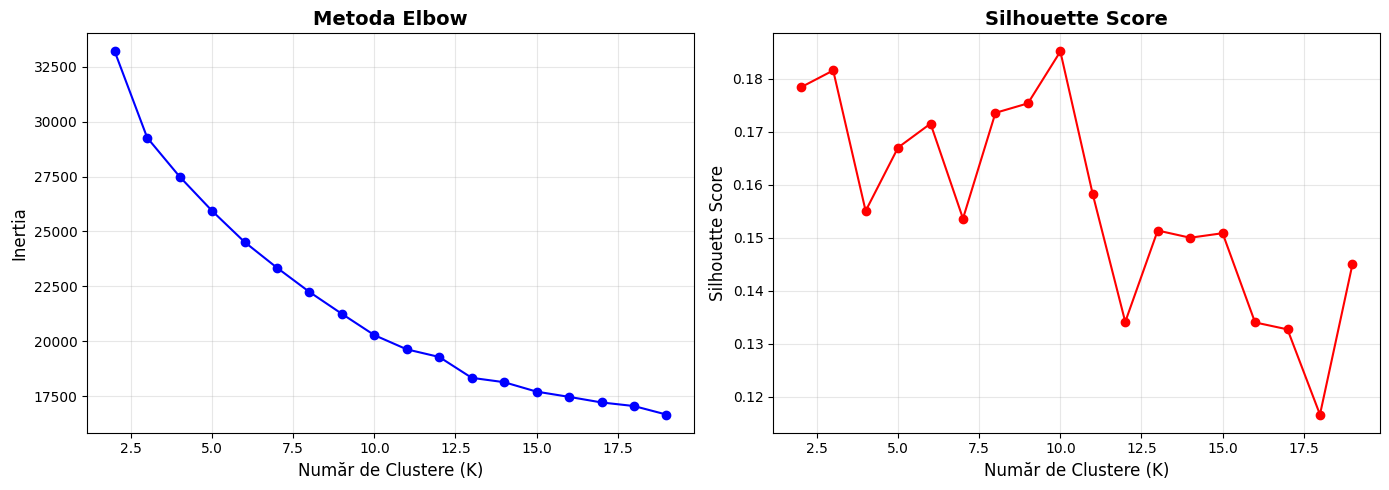

In [7]:
inertia_values = []
silhouette_scores = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_preprocessed)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_preprocessed, kmeans.labels_))
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertia_values, 'bo-')
axes[0].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Metoda Elbow', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Număr de Clustere (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0    613
1    608
2    239
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0             613.0  141964.137031  33598.383555   39300.0  122900.0   
1             608.0  243901.557566  80929.790264  124000.0  187500.0   
2             239.0  120622.523013  37263.107275   34900.0   97500.0   

                   50%       75%       max  
ClusterLabel                                
0             139900.0  159500.0  311500.0  
1             223250.0  275000.0  755000.0  
2             119900.0  140000.0  325000.0  


In [9]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_preprocessed)

df['ClusterLabel'] = cluster_labels

print(f"\nDistribuția clusterelor:")
print(pd.Series(cluster_labels).value_counts().sort_index())

print(f"\nStatistici SalePrice pe clustere:")
cluster_stats = df.groupby('ClusterLabel')['SalePrice'].describe()
print(cluster_stats)


Distribuția clusterelor:
0     80
1    353
2    221
3    541
4    265
Name: count, dtype: int64

Statistici SalePrice pe clustere:
              count           mean           std       min       25%  \
ClusterLabel                                                           
0              80.0  142256.425000  42376.853783   40000.0  120825.0   
1             353.0  203953.028329  39319.768617  127500.0  177500.0   
2             221.0  119811.687783  32300.108699   34900.0  100000.0   
3             541.0  141072.347505  33670.139000   39300.0  120500.0   
4             265.0  294228.264151  93068.598507  129000.0  232000.0   

                   50%       75%       max  
ClusterLabel                                
0             139500.0  167750.0  244600.0  
1             194201.0  225000.0  392500.0  
2             119900.0  139400.0  265979.0  
3             139000.0  158500.0  311500.0  
4             279500.0  335000.0  755000.0  


In [10]:
df_classification = df.drop('SalePrice', axis=1)
X_class = df_classification.drop('ClusterLabel', axis=1)
Y_class = df_classification['ClusterLabel']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split( X_class, Y_class, test_size=0.2, random_state=42, stratify=Y_class)

print(f"\nTrain set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nDistribuție train:\n{Y_train.value_counts().sort_index()}")
print(f"\nDistribuție test:\n{Y_test.value_counts().sort_index()}")


Train set: (1168, 31)
Test set: (292, 31)

Distribuție train:
ClusterLabel
0     64
1    282
2    177
3    433
4    212
Name: count, dtype: int64

Distribuție test:
ClusterLabel
0     16
1     71
2     44
3    108
4     53
Name: count, dtype: int64


In [12]:
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=7)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

preprocessor_imputer = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


logistic_reg = LogisticRegression(random_state=42,max_iter=2000, penalty='l2',solver='lbfgs')
decision_tree_class = DecisionTreeClassifier(random_state=42,splitter='random', min_samples_leaf=1, min_samples_split=10, min_impurity_decrease=0.0, max_features=None, max_depth=10, criterion='gini', class_weight = None)
random_forest_class = RandomForestClassifier(random_state=42,n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True)
knn_class = KNeighborsClassifier(weights='distance',p=1, n_neighbors=7, metric='manhattan')
xgboost_class = XGBClassifier(random_state=42,subsample=0.8, reg_lambda= 2, reg_alpha= 0.1, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0, colsample_bytree=0.9)
gradient_class = GradientBoostingClassifier(random_state=42,subsample=0.9, n_estimators=300, min_samples_leaf=1, min_samples_split=10, max_depth=3, learning_rate=0.1)
svm_class = SVC(random_state=42,probability=True, kernel='rbf', gamma=0.001, degree=2, C=100)
lightgbm_class = LGBMClassifier(random_state=42,subsample=0.8, reg_lambda=0.5, reg_alpha=0.1, num_leaves=50, n_estimators=200, min_child_samples=30, max_depth=-1, learning_rate=0.2, colsample_bytree=0.8)
catboost_class = CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=1, iterations=200, depth=6, border_count=64, bagging_temperature=0.5,  verbose=0 )
voting_1 = VotingClassifier(
    estimators=[
        ('svm', svm_class),
        ('lr', logistic_reg),
        ('rfc', random_forest_class)
    ],
    voting='hard'
)

voting_2 = VotingClassifier(
    estimators=[
        ('svm', svm_class),
        ('lr', logistic_reg),
        ('xgb', xgboost_class),
    ],
    voting='soft'
)

voting_3 = VotingClassifier(
    estimators=[
        ('lr', logistic_reg),
        ('dt', decision_tree_class),
        ('knn', knn_class),
        ('svm', svm_class)

    ],
    voting='soft'
)


In [14]:
voting_1_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_1)
])

voting_2_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_2)
])

voting_3_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_imputer),
    ('voting_classifier', voting_3)
])

voting_1_pipeline.fit(X_train, Y_train)
Y_pred_voting_1 = voting_1_pipeline.predict(X_test)

voting_2_pipeline.fit(X_train, Y_train)
Y_pred_voting_2 = voting_2_pipeline.predict(X_test)

voting_3_pipeline.fit(X_train, Y_train)
Y_pred_voting_3 = voting_3_pipeline.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, precision_score, recall_score

print("\n=== Voting 1 (hard) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_1):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_1, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_1, digits=4))

print("\n=== Voting 2 (soft) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_2):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_2, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_2, digits=4))


print("\n=== Voting 3 (soft) ===")
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_voting_3):.5f}")
print(f"F1: {f1_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")
print(f"Precision: {precision_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")
print(f"Recall: {recall_score(Y_test, Y_pred_voting_3, average='weighted'):.5f}")

print(classification_report(Y_test, Y_pred_voting_3, digits=4))




=== Voting 1 (hard) ===
Accuracy: 0.97603
F1: 0.97595
Precision: 0.97608
Recall: 0.97603
              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677        16
           1     0.9718    0.9718    0.9718        71
           2     1.0000    1.0000    1.0000        44
           3     0.9727    0.9907    0.9817       108
           4     0.9615    0.9434    0.9524        53

    accuracy                         0.9760       292
   macro avg     0.9812    0.9687    0.9747       292
weighted avg     0.9761    0.9760    0.9760       292


=== Voting 2 (soft) ===
Accuracy: 0.97945
F1: 0.97933
Precision: 0.97950
Recall: 0.97945
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        16
           1     0.9714    0.9577    0.9645        71
           2     1.0000    1.0000    1.0000        44
           3     0.9730    1.0000    0.9863       108
           4     0.9804    0.9434    0.9615        53

    a

In [16]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_1_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 1 accuracy CV mean: {scores.mean():.8f}")

scores = cross_val_score(voting_2_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 2 accuracy CV mean: {scores.mean():.8f}")

scores = cross_val_score(voting_3_pipeline, X_class, Y_class, cv=5, scoring='accuracy')
print(f"Voting 3 accuracy CV mean: {scores.mean():.6f}")

Voting 1 accuracy CV mean: 0.98082192
Voting 2 accuracy CV mean: 0.98082192
Voting 3 accuracy CV mean: 0.972603


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

results = {}
individual_models = {
    'logistic_reg': LogisticRegression(random_state=42,max_iter=2000, penalty='l2',solver='lbfgs'),
    'decision_tree_class': DecisionTreeClassifier(random_state=42,splitter='random', min_samples_leaf=1, min_samples_split=10, min_impurity_decrease=0.0, max_features=None, max_depth=10, criterion='gini', class_weight = None),
    'random_forest_class': RandomForestClassifier(random_state=42,n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True),
    'knn_class': KNeighborsClassifier(weights='distance',p=1, n_neighbors=7, metric='manhattan'),
    'xgboost_class': XGBClassifier(random_state=42,subsample=0.8, reg_lambda= 2, reg_alpha= 0.1, n_estimators=200, min_child_weight=5, max_depth=9, learning_rate=0.1, gamma=0, colsample_bytree=0.9),
    'gradient_class': GradientBoostingClassifier(random_state=42,subsample=0.9, n_estimators=300, min_samples_leaf=1, min_samples_split=10, max_depth=3, learning_rate=0.1),
    'svm_class' : SVC(random_state=42,probability=True, kernel='rbf', gamma=0.001, degree=2, C=100),
#'lightgbm_class': LGBMClassifier(random_state=42,subsample=0.8, reg_lambda=0.5, reg_alpha=0.1, num_leaves=50, n_estimators=200, min_child_samples=30, max_depth=-1, learning_rate=0.2, colsample_bytree=0.8),
    'catboost_class': CatBoostClassifier(random_state=42,learning_rate=0.1, l2_leaf_reg=1, iterations=200, depth=6, border_count=64, bagging_temperature=0.5,  verbose=0 )
}
X_train_preprocessed = preprocessor_imputer.fit_transform(X_train)
X_test_preprocessed = preprocessor_imputer.transform(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_preprocessed)
X_test_scaled = scaler.transform(X_test_preprocessed)

for name, model in individual_models.items():
    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(Y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5)
    results[name] = {'accuracy': acc, 'cv_mean': cv_scores.mean(), 'cv_std': cv_scores.std()}
    print(f"{name}: Accuracy={acc:.4f}, CV Mean={cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")


logistic_reg: Accuracy=0.9589, CV Mean=0.9803 (+/- 0.0120)
decision_tree_class: Accuracy=0.9007, CV Mean=0.9033 (+/- 0.0043)
random_forest_class: Accuracy=0.9384, CV Mean=0.9469 (+/- 0.0189)
knn_class: Accuracy=0.9041, CV Mean=0.9144 (+/- 0.0197)
xgboost_class: Accuracy=0.9281, CV Mean=0.9606 (+/- 0.0095)
gradient_class: Accuracy=0.9349, CV Mean=0.9563 (+/- 0.0129)
svm_class: Accuracy=0.9726, CV Mean=0.9709 (+/- 0.0087)
catboost_class: Accuracy=0.9452, CV Mean=0.9623 (+/- 0.0142)


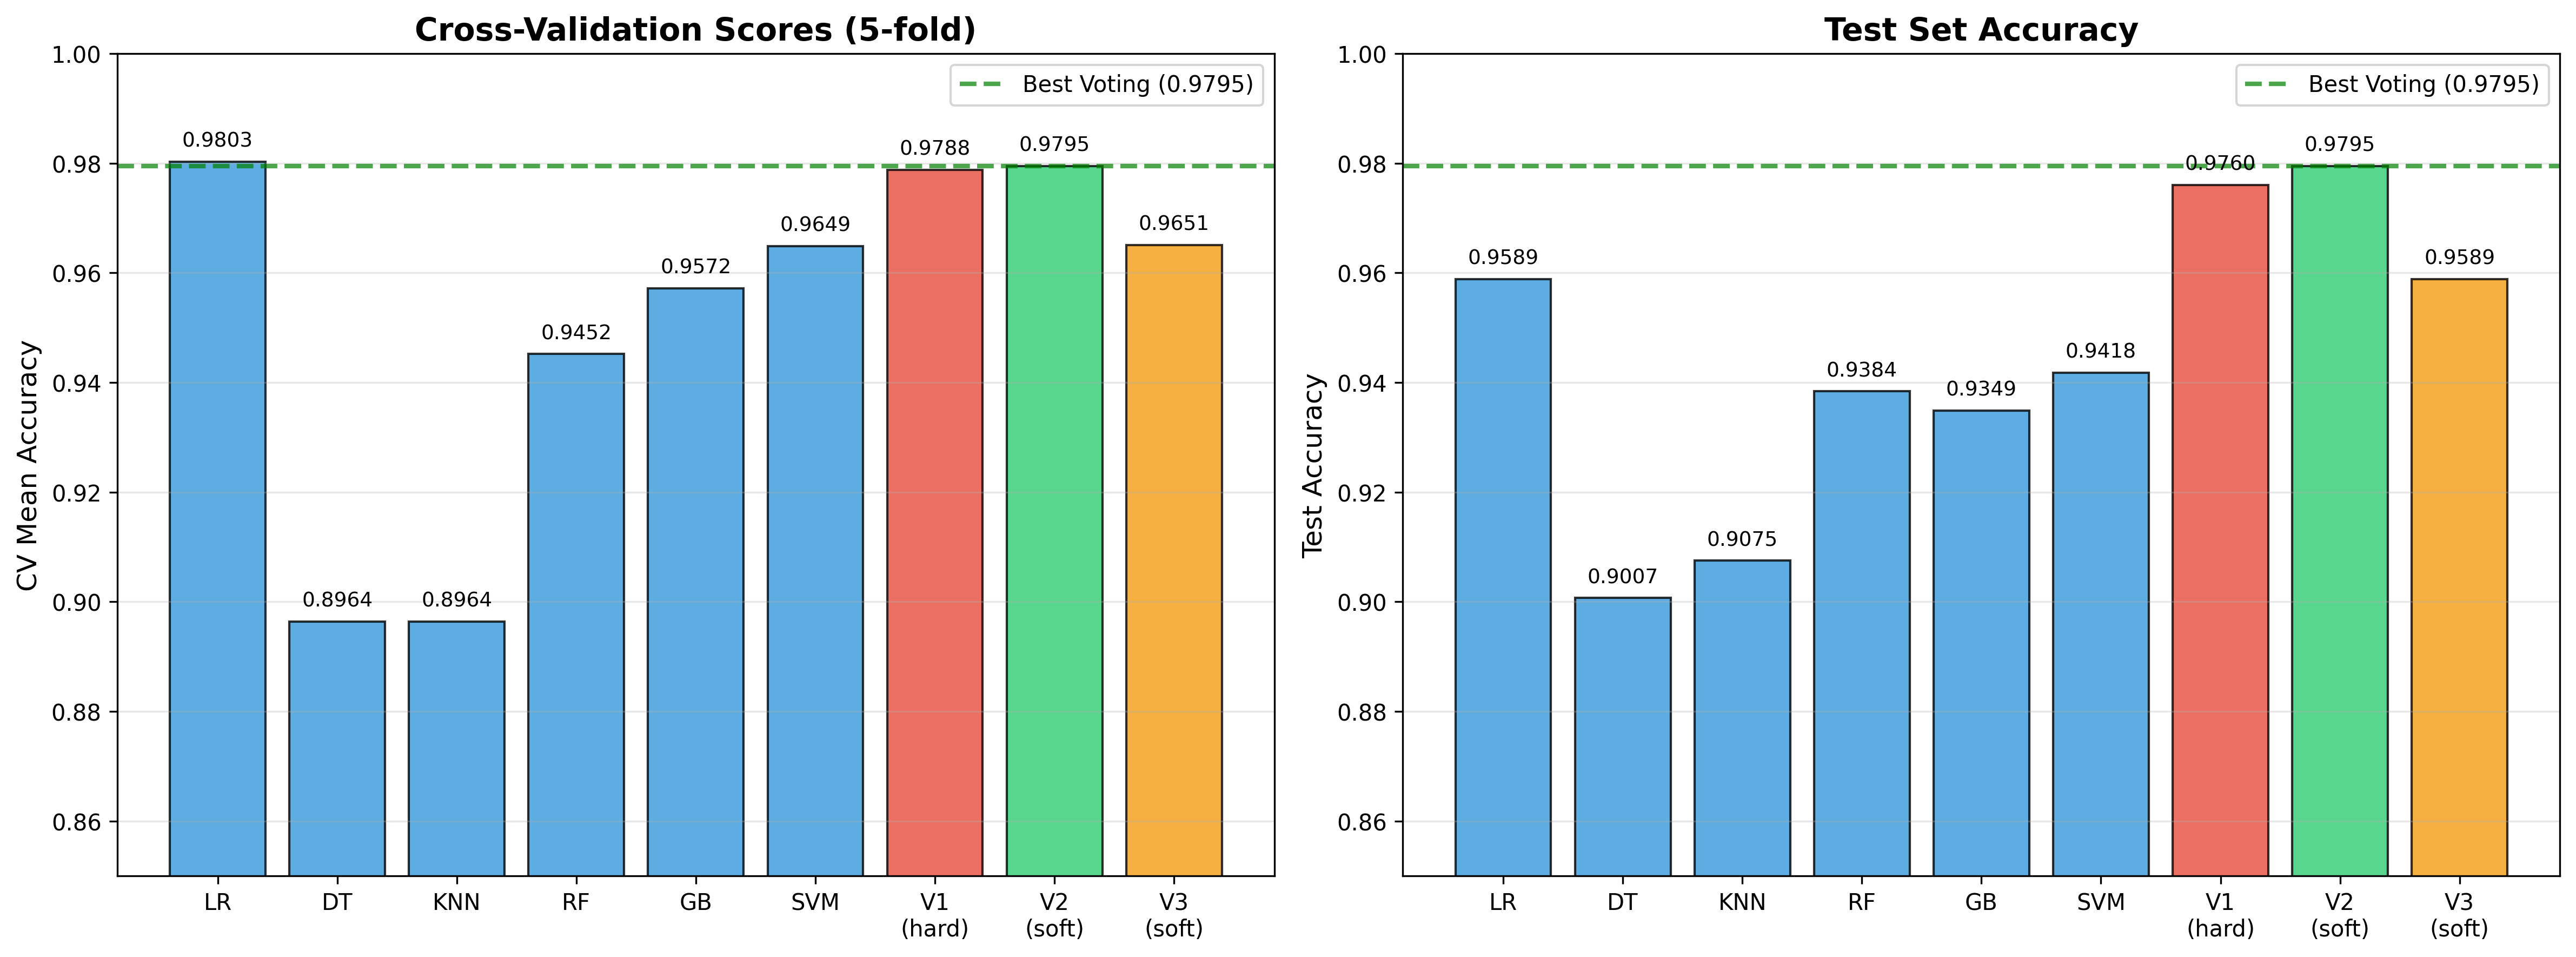

| Model                     | Accuracy (Test) | CV Mean | 
|---------------------------|-----------------|---------|
| Logistic Regression       | **0.9589**          | **0.9803**  | 
| Decision Tree             | 0.9007          | 0.8964  | 
| KNN                       | 0.9075          | 0.8964  |  
| Random Forest             | 0.9384          | 0.9452  |  
| Gradient Boosting         | 0.9349          | 0.9572  | 
| SVM                       | 0.9418          | 0.9649  |  

| Voting Classifier         | Accuracy (Test) | CV Mean | 
|---------------------------|-----------------|---------|
| Voting 1 (Hard)           | 0.9760          | 0.9788  | 
| Voting 2 (Soft)           | **0.9795**      | **0.9795** | 
| Voting 3 (Soft)           | 0.9589          | 0.9651  | 

## A îmbunătățit VotingClassifier rezultatele?

Da.
Toate cele trei variante de VotingClassifier au obținut **acuratețe mai mare decât majoritatea modelelor individuale**:

* **Cea mai bună combinație individuală** are

  * Logistic Regression: **Accuracy = 0.9589**, CV mean ≈ **0.9803**
* Ensembles:

  * **Voting 1 (hard)**: Accuracy ≈ **0.9760**, CV mean ≈ **0.9788**
  * **Voting 2 (soft)**: Accuracy ≈ **0.9795**, CV mean ≈ **0.9795**
  * **Voting 3 (soft)**: Accuracy ≈ **0.9589**, CV mean ≈ **0.9651**

Deci, în practică, **VotingClassifier a îmbunătățit rezultatele față de fiecare model folosit separat** (în special față de Decision Tree, KNN, Random Forest, Gradient Boosting).

 **Concluzie.**
 * VotingClassifier a îmbunătățit rezultatele față de majoritatea modelelor individuale.
 * Cea mai bună performanță a fost obținută de combinația **Voting 2 (soft)**, cu o acuratețe de aproximativ 0.98 și un scor F1 similar, depășind atât Voting 1 (hard), cât și Voting 3, dar și clasificatorii individuali.

* Soft voting funcționează mai bine deoarece combină informația probabilistică furnizată de mai multe modele,  iar erorile fiecărui model tind să se compenseze. În schimb, Voting 3 include și modele mai slabe, care duc la o scădere a performanței ensemble-ului.


# StackingClassifier


In [26]:
base_estimators_1 = [
    ('lr', LogisticRegression(random_state=42,max_iter=2000, penalty='l2',solver='lbfgs')),
    ('rf', RandomForestClassifier(random_state=42,n_estimators=300, min_samples_leaf=1, min_samples_split=5, max_features='sqrt', max_depth=None, bootstrap=True)),
    ('svm', SVC(random_state=42,probability=True, kernel='rbf', gamma=0.001, degree=2, C=100))
]

base_estimators_2 = [
    ('xgb', XGBClassifier()),
    ('gradient', GradientBoostingClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

base_estimators_3 = [
    ('catboost', CatBoostClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('svc', SVC())
]

In [27]:
stacking_models = {
    'Stacking 1 ': StackingClassifier(
        estimators=base_estimators_1,
        final_estimator=SVC(random_state=42),
        cv=5
    ),
    
    'Stacking 2 ': StackingClassifier(
        estimators=base_estimators_2,
        final_estimator=LogisticRegression(random_state=42),
        cv=5
    ),
    
    'Stacking 3 ': StackingClassifier(
        estimators=base_estimators_3,
        final_estimator=RandomForestClassifier(random_state=42),
        cv=5
    )
}

In [28]:
stacking_results ={}
for name, model in stacking_models.items():
    print(f"\n training {name}")

    model.fit(X_train_scaled, Y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted')
    recall = recall_score(Y_test, y_pred, average='weighted')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5, scoring='accuracy', n_jobs=-1)
    stacking_results[name] = {
        'accuracy': acc,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'y_pred': y_pred
    }
    
    print(f"Test Accuracy: {acc:.4f}")
    print(f"CV Mean: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")
    print(f"\n   Classification Report:")
    print(classification_report(Y_test, y_pred, digits=4))



 training Stacking 1 
Precision: 0.9658
Recall: 0.9658
Test Accuracy: 0.9658
CV Mean: 0.9820 (± 0.0106)

   Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677        16
           1     0.9444    0.9577    0.9510        71
           2     1.0000    1.0000    1.0000        44
           3     0.9725    0.9815    0.9770       108
           4     0.9423    0.9245    0.9333        53

    accuracy                         0.9658       292
   macro avg     0.9718    0.9603    0.9658       292
weighted avg     0.9658    0.9658    0.9657       292


 training Stacking 2 
Precision: 0.9624
Recall: 0.9623
Test Accuracy: 0.9623
CV Mean: 0.9795 (± 0.0136)

   Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9375    0.9677        16
           1     0.9437    0.9437    0.9437        71
           2     1.0000    1.0000    1.0000        44
           3     0.9725    0.9

# **Stacking Models — Metrics Comparison (MD Table)**

### **Overall Metrics**

| Model          | Precision     | Recall     | Test Accuracy | CV Mean    | CV Std     |
| -------------- | ------------- | ---------- | ------------- | ---------- | ---------- |
| **Stacking 1** | **0.9658**    | **0.9658** | **0.9658**    | **0.9820** | **0.0106** |
| **Stacking 2** | 0.9624        | 0.9623     | 0.9623        | 0.9795     | 0.0136     |
| **Stacking 3** | — (not given) | 0.9589     | 0.9589        | 0.9692     | 0.0106     |

---

# **Classification Report — Macro Metrics**

| Model          | Macro Precision | Macro Recall | Macro F1   |
| -------------- | --------------- | ------------ | ---------- |
| **Stacking 1** | **0.9718**      | **0.9603**   | **0.9658** |
| **Stacking 2** | 0.9681          | 0.9574       | 0.9626     |
| **Stacking 3** | 0.9653          | 0.9645       | 0.9647     |

---

# **Per-Class F1 Scores**

| Class | Stacking 1 F1 | Stacking 2 F1 | Stacking 3 F1 |
| ----- | ------------- | ------------- | ------------- |
| **0** | 0.9677        | 0.9677        | **1.0000**    |
| **1** | 0.9510        | 0.9437        | 0.9496        |
| **2** | **1.0000**    | **1.0000**    | 0.9885        |
| **3** | 0.9770        | 0.9770        | 0.9677        |
| **4** | 0.9333        | 0.9245        | 0.9174        |




# Clustering methods

In [21]:
pipeline_dt = Pipeline([
    ('preprocessor', preprocessor_imputer),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'classifier__max_depth': [5, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

cv_scores = cross_val_score(pipeline_dt, X_train, Y_train, cv=5, scoring='accuracy')
print(f"   CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

grid_search_dt = GridSearchCV( pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1 )

grid_search_dt.fit(X_train, Y_train)

print(f"\n   Best CV Accuracy: {grid_search_dt.best_score_:.4f}")
y_pred = grid_search_dt.predict(X_test)


accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"\nClassification Report:")
print(classification_report(Y_test, y_pred))

c:\Users\dariu\Documents\GithubRepos\house-price-prediction-integra\venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [4] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


   CV Accuracy: 0.8956 (+/- 0.0130)
Fitting 5 folds for each of 90 candidates, totalling 450 fits

   Best CV Accuracy: 0.8956
Test Accuracy: 0.9007

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.87      0.83      0.85        71
           2       1.00      0.98      0.99        44
           3       0.94      0.94      0.94       108
           4       0.76      0.85      0.80        53

    accuracy                           0.90       292
   macro avg       0.91      0.91      0.91       292
weighted avg       0.90      0.90      0.90       292



| Metric | K=3 | K=4 | K=5 |
|--------|-----|-----|-----|
| **CV Accuracy (mean)** | 0.9512 | 0.8904 | 0.8956 |
| **CV Accuracy (std)** | ±0.0147 | ±0.0170 | ±0.0130 |
| **Best CV Accuracy** | 0.9521 | 0.9058 | 0.8956 |
| **Test Accuracy** | **0.9452** | 0.8904 | 0.9007 |
| **GridSearch Combinations** | 450 fits | 450 fits | 450 fits |

---

## K=3 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.92 | 0.96 | 0.94 | 123 |
| 1 | 0.96 | 0.91 | 0.93 | 121 |
| 2 | **0.98** | **1.00** | **0.99** | 48 |
| **Accuracy** | - | - | **0.95** | 292 |
| **Macro avg** | 0.95 | 0.96 | 0.95 | 292 |
| **Weighted avg** | 0.95 | 0.95 | 0.95 | 292 |

---

## K=4 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | 0.82 | 0.82 | 0.82 | 55 |
| 1 | 0.88 | 0.81 | 0.84 | 72 |
| 2 | 0.89 | 0.93 | 0.91 | 118 |
| 3 | **1.00** | **1.00** | **1.00** | 47 |
| **Accuracy** | - | - | **0.89** | 292 |
| **Macro avg** | 0.90 | 0.89 | 0.89 | 292 |
| **Weighted avg** | 0.89 | 0.89 | 0.89 | 292 |

---

## K=5 Clustere - Rezultate Detaliate

| Cluster | Precision | Recall | F1-Score | Support |
|---------|-----------|--------|----------|---------|
| 0 | **1.00** | 0.94 | 0.97 | 16 |
| 1 | 0.87 | 0.83 | 0.85 | 71 |
| 2 | **1.00** | 0.98 | 0.99 | 44 |
| 3 | 0.94 | 0.94 | 0.94 | 108 |
| 4 | 0.76 | 0.85 | 0.80 | 53 |
| **Accuracy** | - | - | **0.90** | 292 |
| **Macro avg** | 0.91 | 0.91 | 0.91 | 292 |
| **Weighted avg** | 0.90 | 0.90 | 0.90 | 292 |

